# 📊 Analysis of Amazon Prime platform

## Import Libraries

In [1]:
import pandas as pd

## Load dataset

In [2]:
df=pd.read_csv(r"E:\Project OTT\amazon_prime_titles.csv")

## Inspect Data

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9667 non-null   object
 1   type          9667 non-null   object
 2   title         9666 non-null   object
 3   director      7567 non-null   object
 4   cast          8395 non-null   object
 5   country       671 non-null    object
 6   date_added    154 non-null    object
 7   release_year  9667 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9667 non-null   object
 10  listed_in     9667 non-null   object
 11  description   9647 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.4+ KB


We need to check the data type and Null values

In [4]:
df.isnull().sum()

show_id            0
type               0
title              1
director        2100
cast            1272
country         8996
date_added      9513
release_year       0
rating           336
duration           0
listed_in          0
description       20
dtype: int64

In [5]:
df['title'] = df['title'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['duration'] = df['duration'].fillna(0)
df['rating'] = df['rating'].fillna('NR')
df['country']=df['country'].fillna('Unknown')
df['description']=df['description'].fillna('Unknown')


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added      9513
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

The [date_added] column have 95% null values , So I'm dropping that column

In [7]:
df = df.drop('date_added', axis=1)

## Check the Datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9667 entries, 0 to 9666
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9667 non-null   object
 1   type          9667 non-null   object
 2   title         9667 non-null   object
 3   director      9667 non-null   object
 4   cast          9667 non-null   object
 5   country       9667 non-null   object
 6   release_year  9667 non-null   int64 
 7   rating        9667 non-null   object
 8   duration      9667 non-null   object
 9   listed_in     9667 non-null   object
 10  description   9667 non-null   object
dtypes: int64(1), object(10)
memory usage: 830.9+ KB


In [9]:
#### Split the Listed_in and cast column

In [10]:
df_cast = df[['title', 'cast']].dropna().copy()

# Split cast string by comma and explode to rows
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')

# Remove 'unknown' or any empty values
df_cast['cast'] = df_cast['cast'].str.strip()
df_cast = df_cast[df_cast['cast'].str.lower() != 'unknown']
df_cast = df_cast[df_cast['cast'] != '']

# remove duplicates
df_cast.drop_duplicates(inplace=True)

df_genres = df[['title', 'listed_in']].dropna().copy()

# Split genre string and explode
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

# Clean genre column
df_genres['genre'] = df_genres['genre'].str.strip()
df_genres = df_genres[df_genres['genre'].str.lower() != 'unknown']
df_genres = df_genres[df_genres['genre'] != '']

# drop duplicates
df_genres.drop_duplicates(inplace=True)

df = df.dropna(subset=['listed_in']).copy()
df['genre'] = df['listed_in'].str.split(', ')
df = df.explode('genre')
df['genre'] = df['genre'].str.strip()
df = df.dropna(subset=['cast']).copy()
df['actor'] = df['cast'].str.split(', ')
df = df.explode('actor')
df['actor'] = df['actor'].str.strip()

In [11]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,genre,actor
0,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,1994,NR,92 min,Drama,Sally Goodson is a devoted mother to her autis...,Drama,Kirstie Alley
0,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,1994,NR,92 min,Drama,Sally Goodson is a devoted mother to her autis...,Drama,Sam Waterston
0,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,1994,NR,92 min,Drama,Sally Goodson is a devoted mother to her autis...,Drama,Stockard Channing
1,s100,Movie,Wilder Napalm,Glenn Gordon Caron,"Debra Winger, Dennis Quaid, Arliss Howard, M. ...",Unknown,1993,PG-13,109 min,"Comedy, Science Fiction",Two brothers with the secret power of starting...,Comedy,Debra Winger
1,s100,Movie,Wilder Napalm,Glenn Gordon Caron,"Debra Winger, Dennis Quaid, Arliss Howard, M. ...",Unknown,1993,PG-13,109 min,"Comedy, Science Fiction",Two brothers with the secret power of starting...,Comedy,Dennis Quaid


## Download Data for comparative analysis

In [12]:
df.to_csv('Amazon_Prime.csv', index=False)

## Exploratory Analysis for Amazon Prime

#### Count of Movies vs TV Shows

In [13]:
df['type'].value_counts()

type
Movie      74210
TV Show    12833
Name: count, dtype: int64

#### #% of Movies vs TV Shows

In [14]:
df['type'].value_counts(normalize=True) * 100

type
Movie      85.256712
TV Show    14.743288
Name: proportion, dtype: float64

#### Most Released Type in the Latest Year

In [15]:
latest_year = df['release_year'].max()
df[df['release_year'] == latest_year]['type'].value_counts()

type
Movie      11090
TV Show     2545
Name: count, dtype: int64

#### Count of Each Rating

In [16]:
df['rating'].value_counts()

rating
13+         21544
16+         14422
18+         11950
R           11009
ALL          6519
PG-13        5543
NR           4043
PG           3369
7+           2933
TV-14        1239
TV-PG         828
G             768
TV-MA         721
TV-G          593
TV-NR         514
TV-Y          395
TV-Y7         301
UNRATED       237
AGES_18_       43
AGES_16_       33
NOT_RATE       22
NC-17          13
16              3
ALL_AGES        1
Name: count, dtype: int64

#### Rating Distribution by Content Type

In [17]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    13+         19441
         16+         11470
         R           11009
         18+         10466
         ALL          5586
         PG-13        5543
         NR           3811
         PG           3369
         7+           2395
         G             768
         UNRATED       237
         AGES_18_       43
         AGES_16_       33
         NOT_RATE       22
         NC-17          13
         16              3
         ALL_AGES        1
TV Show  16+          2952
         13+          2103
         18+          1484
         TV-14        1239
         ALL           933
         TV-PG         828
         TV-MA         721
         TV-G          593
         7+            538
         TV-NR         514
         TV-Y          395
         TV-Y7         301
         NR            232
Name: count, dtype: int64

#### Average movie duration

In [18]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 98


#### Top 5 Most Common Genres

In [19]:
df['genre'].value_counts().head(5)

genre
Drama       21135
Comedy      11224
Action       9086
Suspense     8660
Horror       4316
Name: count, dtype: int64

#### Genre per Content Type


In [20]:
df.groupby('type')['genre'].value_counts().head(10)

type   genre           
Movie  Drama               18439
       Comedy               9819
       Action               8389
       Suspense             7945
       Horror               4197
       Romance              3276
       Documentary          2292
       Kids                 2208
       Science Fiction      2186
       Special Interest     1842
Name: count, dtype: int64

#### Most common actors in the platform

In [21]:
#Step-1: split and flatten the cast column
from collections import Counter
all_cast = df['actor'].dropna().str.split(', ')
flat_cast = [actor for sublist in all_cast for actor in sublist]

#Step-2: Count the actors
filtered_cast = [actor for actor in flat_cast if actor.lower() != 'unknown']
cast_count = Counter(filtered_cast)
cast_count.most_common(5)

[('Cassandra Peterson', 59),
 ('Maggie Binkley', 57),
 ('Ph.D.', 53),
 ('Gene Autry', 52),
 ('Prakash Raj', 52)]

#### Content by specific actor

In [22]:
df[df['actor'].str.contains('Shah Rukh Khan', na=False)]


,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,genre,actor
4726,s5253,Movie,Rab Ne Bana Di Jodi,Aditya Chopra,"Shah Rukh Khan, Anushka Sharma, Rani Mukerji, ...",India,2008,ALL,164 min,"Drama, International, Romance",This is a story of Surinder Sahni (Shahrukh Kh...,Drama,Shah Rukh Khan
4726,s5253,Movie,Rab Ne Bana Di Jodi,Aditya Chopra,"Shah Rukh Khan, Anushka Sharma, Rani Mukerji, ...",India,2008,ALL,164 min,"Drama, International, Romance",This is a story of Surinder Sahni (Shahrukh Kh...,International,Shah Rukh Khan
4726,s5253,Movie,Rab Ne Bana Di Jodi,Aditya Chopra,"Shah Rukh Khan, Anushka Sharma, Rani Mukerji, ...",India,2008,ALL,164 min,"Drama, International, Romance",This is a story of Surinder Sahni (Shahrukh Kh...,Romance,Shah Rukh Khan
4749,s5274,Movie,Kal Ho Naa Ho,Nikkhil Advani,"Shah Rukh Khan, Preity Zinta, Saif Ali Khan, J...",India,2003,ALL,187 min,"Comedy, Drama, International",Naina Kapur is a beautiful introvert and often...,Comedy,Shah Rukh Khan
4749,s5274,Movie,Kal Ho Naa Ho,Nikkhil Advani,"Shah Rukh Khan, Preity Zinta, Saif Ali Khan, J...",India,2003,ALL,187 min,"Comedy, Drama, International",Naina Kapur is a beautiful introvert and often...,Drama,Shah Rukh Khan
4749,s5274,Movie,Kal Ho Naa Ho,Nikkhil Advani,"Shah Rukh Khan, Preity Zinta, Saif Ali Khan, J...",India,2003,ALL,187 min,"Comedy, Drama, International",Naina Kapur is a beautiful introvert and often...,International,Shah Rukh Khan
4765,s5289,Movie,Fan,Maneesh Sharma,"Shah Rukh Khan, Sayani Gupta, Shriya Pilgaonka...",India,2016,13+,138 min,"Drama, International, Suspense",FAN is the story of Gaurav (Shah Rukh Khan) a ...,Drama,Shah Rukh Khan
4765,s5289,Movie,Fan,Maneesh Sharma,"Shah Rukh Khan, Sayani Gupta, Shriya Pilgaonka...",India,2016,13+,138 min,"Drama, International, Suspense",FAN is the story of Gaurav (Shah Rukh Khan) a ...,International,Shah Rukh Khan
4765,s5289,Movie,Fan,Maneesh Sharma,"Shah Rukh Khan, Sayani Gupta, Shriya Pilgaonka...",India,2016,13+,138 min,"Drama, International, Suspense",FAN is the story of Gaurav (Shah Rukh Khan) a ...,Suspense,Shah Rukh Khan
4767,s5290,Movie,Don,Farhan Akhtar,"Shah Rukh Khan, Priyanka Chopra, Isha Koppikar...",Unknown,2006,NR,169 min,"Action, Drama, International",This action-thriller is a remake of the well-k...,Action,Shah Rukh Khan


#### Top cast by type

In [23]:
#top cast by type
from collections import Counter

# Step 1: Get cast data for Movies, drop NaNs, split
movies_cast = df[df['type'] == 'Movie']['cast'].dropna().str.split(', ')

# Step 2: Flatten and filter out 'Unknown'
movies_flat_cast = [
    actor for sublist in movies_cast for actor in sublist if actor.lower() != 'unknown'
]

# Step 3: Count and get top 5
top_actors = Counter(movies_flat_cast).most_common(5)
print(top_actors)

[(' Ph.D.', 969), ('Danny Trejo', 462), ('Anupam Kher', 459), ('Rani Mukerji', 378), ('Prakash Raj', 370)]


## For Dashboard

#### Total Titles on Netflix

In [24]:
total_titles = len(df)
print("Total Titles on Amazon:", total_titles)

Total Titles on Amazon: 87043


#### Average Movie Duration

In [25]:
# Step-1: Separate Movies and TV Shows 
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Step-2: Extract duration in minutes for movie
movies = df[df['type'] == 'Movie'].copy()
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)')
movies['duration_minutes'] = movies['duration_minutes'].astype(float)

#Step-3: Print the average movie duration
print("Average Movie duration is:", int(movies['duration_minutes'].mean()))

Average Movie duration is: 98


#### Content Type Distribution (Movies vs TV Shows)

In [26]:
type_distribution = df['type'].value_counts()
print("Content Type Distribution:")
print(type_distribution)

Content Type Distribution:
type
Movie      74210
TV Show    12833
Name: count, dtype: int64


#### Most Common Genre

In [27]:
df['listed_in_split'] = df['listed_in'].str.split(', ')
genres = df.explode('listed_in_split')
top_genre = genres['listed_in_split'].value_counts().idxmax()
print("Most Common Genre:", top_genre)

Most Common Genre: Drama


#### Top release year

In [28]:
top_years =df['release_year'].value_counts().head(5)
print("Top 5 Release Years on Netflix:")
print(top_years)

Top 5 Release Years on Netflix:
release_year
2021    13635
2020     8497
2019     7714
2018     5486
2017     4294
Name: count, dtype: int64


#### 1) Content release by year

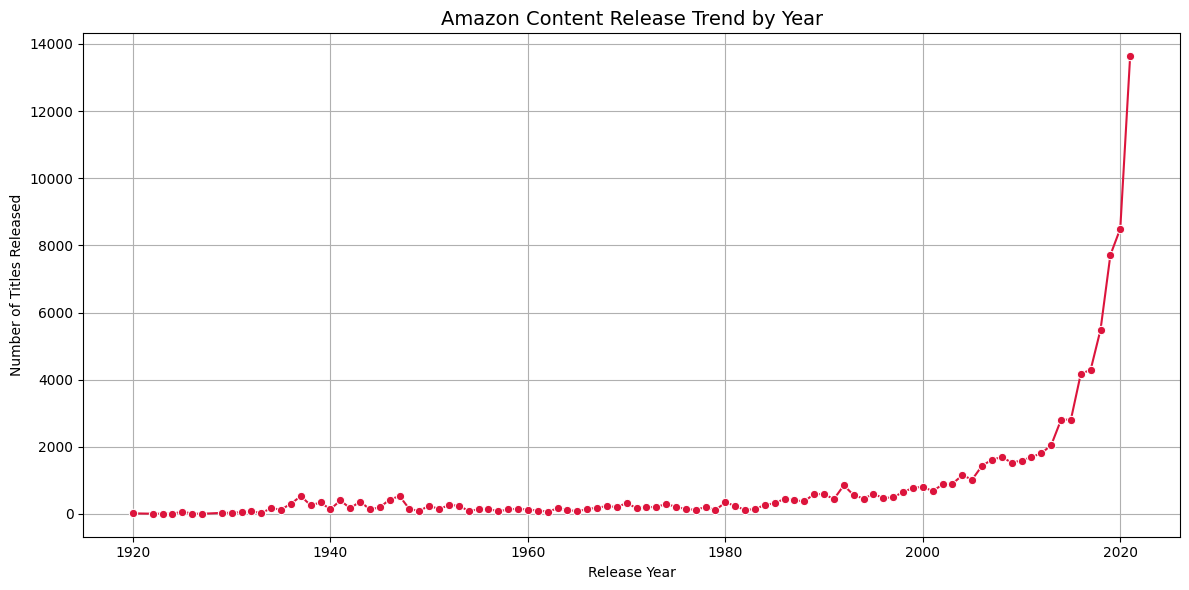

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by release year and count titles
release_trend = df['release_year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_trend.index, y=release_trend.values, marker='o', color='crimson')
plt.title('Amazon Content Release Trend by Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2) Rating distribution

C:\Users\Divya Ramaingam\AppData\Local\Temp\ipykernel_10932\2120730987.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")


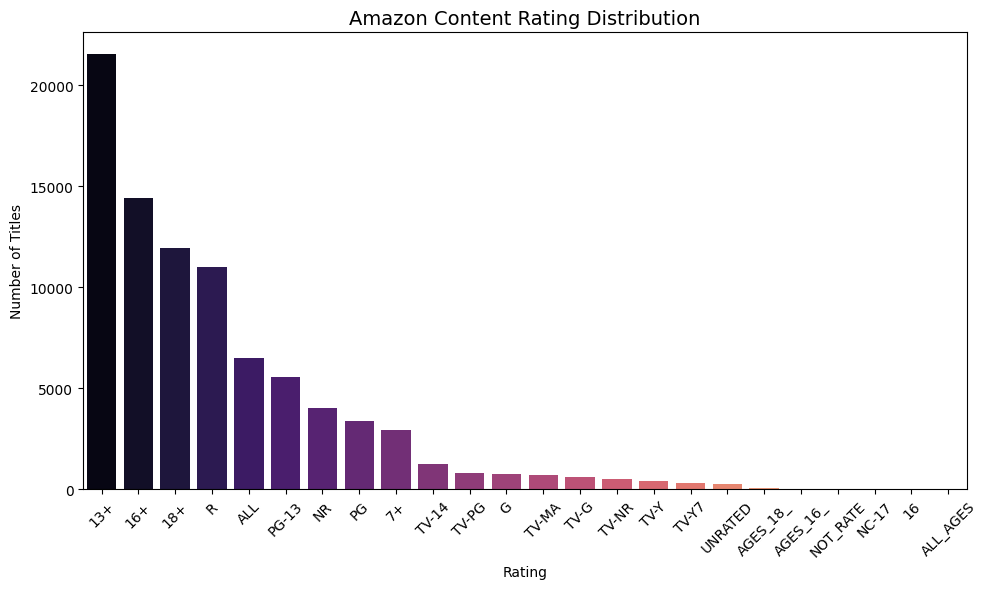

In [30]:
rating_counts = df['rating'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="magma")
plt.title('Amazon Content Rating Distribution', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3)Top Occuring Movie

In [31]:
top_movie = df['title'].value_counts().head(5)

# Display the result
print("Top Occurring Movie on Amazon:")
print(top_movie)

Top Occurring Movie on Amazon:
title
Till The Clouds Roll By    228
Evan Almighty              219
The Rocker                 200
Something To Sing About    200
American Me                186
Name: count, dtype: int64


#### 4)Top cast members

In [37]:
from collections import Counter

# Step 1: Drop null and clean
df_actor = df[['title', 'actor']].dropna().copy()
df_actor = df_actor[~df_actor['actor'].str.contains('Unknown', case=False)]

# Step 2: Split and explode actors
df_actor['actor'] = df_actor['actor'].str.split(', ')
df_actor = df_actor.explode('actor')
df_actor['actor'] = df_actor['actor'].str.strip()

# Step 3: Drop duplicate title-actor pairs
df_actor = df_actor.drop_duplicates(subset=['title', 'actor'])

# Step 4: Count appearances
top_5_unique_actors = df_actor['actor'].value_counts().head(5)

# Display result
print("🎬 Top 5 Actors by Unique Title Appearances:")
for actor, count in top_5_unique_actors.items():
    print(f"{actor}: {count} unique titles")

🎬 Top 5 Actors by Unique Title Appearances:
Maggie Binkley: 56 unique titles
Gene Autry: 32 unique titles
Nassar: 30 unique titles
Champion: 29 unique titles
Anne-Marie Newland: 25 unique titles


#### 5)Top Directors

In [33]:
from collections import Counter

# Drop nulls and exclude 'Unknown'
clean_directors = df['director'].dropna()
clean_directors = clean_directors[~clean_directors.str.contains('Unknown', case=False)]

# Split and flatten
directors_split = clean_directors.str.split(', ')
flat_directors = [director for sublist in directors_split for director in sublist]

# Count top 5
top_5_directors = Counter(flat_directors).most_common(5)

# Display result
print("Top 5 Directors in Amazon Dataset:")
for director, count in top_5_directors:
    print(f"{director}: {count} titles")

Top 5 Directors in Amazon Dataset:
Richard Whorf: 236 titles
Tom Shadyac: 219 titles
Roy William Neill: 215 titles
Michael J. Nelson: 201 titles
Victor Schertzinger: 200 titles


#### 6)Genre Popularity

In [35]:
from collections import Counter

# Drop missing values and split genres
genres = df['genre'].dropna().str.split(', ')
flat_genres = [genre.strip() for sublist in genres for genre in sublist]

# Count and get top 10 genres
genre_count = Counter(flat_genres).most_common(10)

# Display result
print("Top 10 Genres:")
for genre, count in genre_count:
    print(f"{genre}: {count} titles")


Top 10 Genres:
Drama: 21135 titles
Comedy: 11224 titles
Action: 9086 titles
Suspense: 8660 titles
Horror: 4316 titles
Romance: 3728 titles
Kids: 3515 titles
Documentary: 2956 titles
Science Fiction: 2576 titles
Special Interest: 2401 titles


In [36]:
df.to_csv("cleaned_amazon_data.csv", index=False)